### Loading Libraries

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import seaborn as sns

### Step 1: Gathering Data

In [268]:
#importing The WeRateDogs Twitter archive

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [269]:
# The tweet image predictions using request 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as f:
        f.write(r.content)

In [ ]:
# getting Additional data from the Twitter API
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [270]:
#Writing and Reading Twitter JSON

df = []

with open('tweet-json.txt') as f:
    for line in f:
        df.append(json.loads(line))

In [271]:
# to check of the content of the file and make sure it's correct
df[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [272]:
#After reading Create a data frame of the tweet ID,retweet count,favorite count

tweet_data = pd.DataFrame(df,columns=['id','retweet_count','favorite_count'])

#change the name of the column
tweet_data = tweet_data.rename(columns={'id':'tweet_id'})

#saving the tweet_data in a new csv file
tweet_data.to_csv('tweet_data.csv')

tweet_data.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Step 2: Assessing Data

**Detect and document at least eight (8) quality issues and two (2) tidiness issues**

- Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).


- Programmatic assessment: pandas' functions and/or methods are used to assess the data



**Assess data for:**


Quality: issues with content. Low quality data is also known as dirty data.
 
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data 

### Quality

##### `twitter_archive` table issues
- tweet_id format from int to string  
- source format (<.a> href) it's for another language (html) we don't need it so after removing it we can make it categorial
- some dogs name are (missing , wrong)
- invaild datimestamp datatype is a string not a object
- four columns (doggo, floofer, pupper and puppo) have 'None' for missing
- we have in some of the dogs text the rating and link 


##### `Image_predictions` table issues
- we have to change tweet_id type to string so we can combine the dataframes
- difference in the upper and lower case in P names
- we have some columns that we will not use

##### `tweet_data` table issues
- we have to change tweet_id type to string so we can combine the dataframes

### Tidiness

- `twitter_archive table` four columns (doggo, floofer, pupper and puppo) must be in 1 column
.
- all datasets should be 1 dataset.

In [275]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [274]:
# we can see one of the text have the rating and the link so we don't need it " the same for others"
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [276]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [277]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [278]:
twitter_archive.name.value_counts() 

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Rumble       1
Maxwell      1
Barney       1
Rudy         1
Buckley      1
Name: name, Length: 957, dtype: int64

In [279]:
twitter_archive[twitter_archive.expanded_urls.duplicated() & twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [280]:
twitter_archive.query("tweet_id == 878404777348136964")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


### B. Tweet Image predictions Data

In [436]:
Image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
#for tsv we use the " tab "
Image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [282]:
Image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [283]:
Image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### C. Twitter Api Data

In [284]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [285]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [286]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Step 3: Cleaning Data

In [287]:
# Creating copies so we can clean them

clean_archive = twitter_archive.copy()
clean_tweet = tweet_data.copy()
clean_image = Image_predictions.copy()


tweet_id format from int to string

### Define

**Q1. change the data type of tweet_id from int to string**

#### Code

In [288]:
clean_archive["tweet_id"] = clean_archive['tweet_id'].astype(str)

#### Test

In [289]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

source format (<.a> href) it's for another language (html) we don't need it so after removing it we can make it categorial

### Define

**Q2. remove  (<.a> and href) from source and change it to categorial**

#### Code

In [290]:
#function to remove html code from the string 
from bs4 import BeautifulSoup

def fixing_source(x):
    soup = BeautifulSoup(x)
    soup.find('a')
    return soup.string

clean_archive.source = clean_archive.source.apply(lambda x: fixing_source(x)).astype('category')

### Test

In [291]:
#check for unique
clean_archive.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

some dogs name are (missing , wrong)

### Define

**Q3.Replace The None with "NaN" in name using replace method.
Remove any  invaild name  which starts with lower laters and make it nan.**

#### Code

In [292]:
#the str.istitle  method is checking if the first letter of each word is capitalized
# and if we used ~ before it will give us the value that we want
clean_archive[~clean_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [293]:
#here we replace every thing with np.nan witch is Nan
clean_archive.name.replace(['such','a','quite','not','one','incredibly', 'mad','an', 'very', 'just', 'my', 'his', 'actually', 'getting','this', 'unacceptable', 'all', 'old', 'infuriating', 'the','by', 'officially', 'life','light','space','None'],np.nan,inplace=True)

### Test

In [294]:
#here we can see that we fix the missing and wrong names
clean_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

invaild timestamp datatype is a date not a object

### Define

**Q4. change the timestamp datatype to date**

#### Code

In [295]:
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)

### Test

In [296]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

four columns (doggo, floofer, pupper and puppo) have 'None' for missing

### Define

**Q5.replace the None in the four columns (doggo, floofer, pupper and puppo) with np nan and remove the lower case**

#### Code

In [297]:
# here we are checking for each row of the columns if there is a None word and replace it with np.nan
dog_type = ['doggo', 'floofer', 'pupper', 'puppo']
for c in dog_type:
    clean_archive[c] = clean_archive[c].replace('None',np.nan)

### Test

we have in some of the dogs text the rating and link

### Define

**Q6.extract any rating and links fromt the text**

#### Code

In [298]:
#here we clean from the rect the https " links "
clean_archive['text'] = clean_archive['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#and here i remove the numbers for the ratings 
clean_archive['text'] = clean_archive.text.replace('\d+', '', regex=True)
#and here i remove the rating dash " / "
clean_archive['text'] = clean_archive['text'].str.replace('/', '')



### Test

In [299]:
#Check if it's correct
clean_archive.text.sample(10)


279     Meet Sojourner. His nose is a Fibonacci Spiral...
3       This is Darla. She commenced a snooze mid meal...
1952     This is Shnuggles. I would kill for Shnuggles.  
614     Say hello to Romeo. He was just told that it's...
960     "This photographer took pics of her best frien...
912     Here's another picture without a dog in it. Id...
1463    This is Phil. He's an important dog. Can contr...
1081    This is Charles. He's a Nova Scotian Towel Pou...
1531    This pupper can only sleep on shoes. It's a cr...
1485    This is Dunkin. He can only see when he's wet ...
Name: text, dtype: object

**some P names with an extra no needed "_" and there's a difference in upper and lower case**

### Define

**Q7.remove " _" in any name and fix the lowercase and upper case difference**

#### Code

In [300]:
#str.title() function is used to convert strings in the Series/Index to titlecase.
clean_image.p1 = clean_image.p1.str.title()
clean_image.p2 = clean_image.p2.str.title()
clean_image.p3 = clean_image.p3.str.title()
#use replace to remove "_"
clean_image.p1 = clean_image.p1.str.replace('_',' ')
clean_image.p2 = clean_image.p2.str.replace('_',' ')
clean_image.p3 = clean_image.p3.str.replace('_',' ')


### Test

In [301]:
clean_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador Retriever,0.919832,True,Beagle,0.043513,True,Golden Retriever,0.023359,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan Terrier,0.328161,True,Toy Poodle,0.304836,True,Miniature Poodle,0.070878,True
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,Borzoi,0.564688,True,Ice Bear,0.078267,False,Pembroke,0.057916,True
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,Doormat,0.200411,False,Malinois,0.142300,True
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,Cocker Spaniel,0.387608,True,Golden Retriever,0.264844,True,Pekinese,0.122123,True
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,Gibbon,0.061557,False
165,668979806671884288,https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg,1,Golden Retriever,0.608537,True,Irish Setter,0.097078,True,Redbone,0.076022,True
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,Cocker Spaniel,0.740220,True,Dandie Dinmont,0.061604,True,English Setter,0.041331,True
806,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,Minivan,0.332756,False,Sports Car,0.129452,False,Limousine,0.073936,False


we have some columns that we will not use

### Define

**Q8.remove columns that we will not use**

#### Code

In [302]:
clean_image = clean_image.drop(['img_num','p1_conf',
                                'p1_dog', 'p2_conf',
                                'p2_dog', 'p3_conf', 
                                'p3_dog'], 1)


### Test

In [303]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
 3   p2        2075 non-null   object
 4   p3        2075 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.2+ KB


we have to change tweet_id type in tweet_data so we can combine the dataframes

### Define

**Q9.Change tweet_id type to String**

#### Code

In [310]:
clean_image["tweet_id"] = clean_image['tweet_id'].astype(str)

### Test

In [311]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
 3   p2        2075 non-null   object
 4   p3        2075 non-null   object
dtypes: object(5)
memory usage: 81.2+ KB


we have to change tweet_id type in clean_image so we can combine the dataframes

### Define

**Q10.Change tweet_id type to String**

#### Code

In [307]:
clean_tweet["tweet_id"] = clean_tweet['tweet_id'].astype(str)

### Test

In [308]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


twitter_archive table four columns (doggo, floofer, pupper and puppo) must be in 1 column .


### Define

**T1.combine the 4 columns and create a combined column**

In [312]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Code

In [313]:
#i look in the data set and i find that there's the type of the dog in the text
#so i use the extract group method to get them and put them in a new column called dogs_term
clean_archive['dogs_term'] = clean_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')


### Test

In [314]:
#Check if it's correct
clean_archive.dogs_term.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_term, dtype: int64

In [316]:
clean_archive.drop(['pupper', 'doggo','puppo','floofer'], axis='columns', inplace=True)

In [317]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

all datasets should be 1 dataset.

### Define

**T2.merge all the datasets to be 1 dataset**

#### Code

In [318]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
 3   p2        2075 non-null   object
 4   p3        2075 non-null   object
dtypes: object(5)
memory usage: 81.2+ KB


In [319]:
#all of the datasets have tweet_id so we will merge based in the tweet_id
#creating new dataframe 
df = pd.merge(clean_archive,clean_image,on='tweet_id',how='left')
df = pd.merge(df,clean_tweet,on='tweet_id',how='left')

### Test

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Step 4: Storing Data
In the "Storing Data" section in the wrangle_act.ipynb notebook, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv.

In [322]:
df.to_csv('twitter_archive_master.csv')

### Step 5: Analyzing and Visualizing Data
You must produce at least three (3) insights and one (1) visualization.
You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization

### insights 1 & visualization

- first thing come to my mind that i want to look about ratings:
So the most Rating Frequency is 12

In [382]:
visual = df.rating_numerator.value_counts()
visual

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


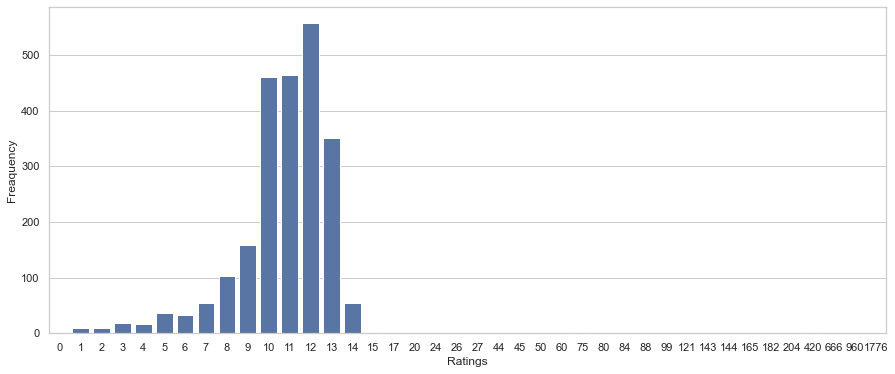

In [437]:
# i learn more about seaborn in: https://pythonbasics.org/seaborn-barplot/
#visual.plot.bar(figsize=(12, 6),title='Ratings freaquency',ylabel='Freaquency',xlabel='rating',color='r');
#visual.values to get array of the values inside the visual
#visual.index to get array of indexes of the values 

x=visual.index
y=visual.values
f, ax = plt.subplots(figsize = (15,6));
sns.set_color_codes(palette='deep');
sns.barplot(x , y 
            , color = 'b', );

plt.xlabel("Ratings");
plt.ylabel("Freaquency");
plt.show();



### insights 2 & visualization

Pupper is the most common dog term in this dataset

In [385]:
df['dogs_term'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_term, dtype: int64

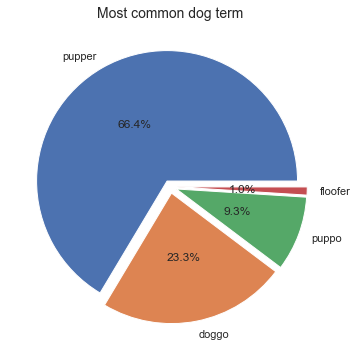

In [389]:
data = df['dogs_term'].value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Most common dog term", fontsize=14);

### insights 3 & visualization

there's a positive correlation betwen the tetweet and favorite

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Retweet Counts by favorite using Scatter Plot')

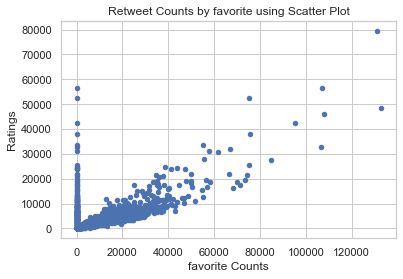

In [431]:
a = df.rating_numerator.value_counts()
df.plot(x='favorite_count',y='retweet_count', kind='scatter');
plt.xlabel('favorite Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by favorite using Scatter Plot')
